In [1]:
import networkx as nx
import json
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
DATASET_NAME = 'USpowerGrid'


In [3]:
rp_path = 'data/rpfs_pos/USpowerGrid/stress,node_resolution.json'
op_path = 'data/opfs_pos/USpowerGrid/node_resolution.json'

In [4]:
with open(rp_path) as f:
    rdata = json.load(f)

with open(op_path) as f:
    odata = json.load(f)


In [5]:
quality_metrics_names = [
    'angular_resolution',
    'aspect_ratio',
    'crossing_angle_maximization',
    'crossing_number',
    'gabriel_graph_property',
    'ideal_edge_length',
    'node_resolution',
    'shape_based_metrics',
    'stress'
]

qname = 'node_resolution'

d = {}

for name in quality_metrics_names:
    d[name] = []



In [6]:
for e in odata['e']:
    points = {}
    for qn in quality_metrics_names:
        points[qn] = []
    for seed in e['seed']:
        t = e['seed'][seed]
        q = t[qname]

        points[qname].append(q)

    d[qname].append(points[qname])

for e in rdata['e']:
    points = {}
    for qn in quality_metrics_names:
        points[qn] = []
    for seed in e['seed']:
        t = e['seed'][seed]
        q = t[qname]

        points[qname].append(q)

    d[qname].append(points[qname])


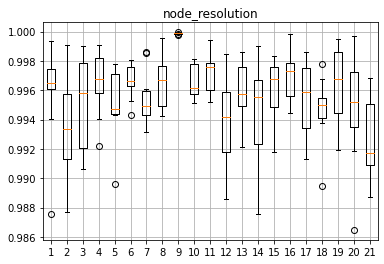

In [7]:
bp = plt.boxplot(d[qname])
plt.title(qname)
plt.grid()
plt.show()
# 0  352350
# 19 377400
# 12 566600